Dataset : Pittsburgh Arrest Data - https://data.wprdc.org/dataset/arrest-data

**How I will use this data : I will use this dataset to count the number of arrests in each unique neighborhood. I will get each neighborhood with the get_neighborhood function which is used accross all metrics to verify we have similar neighborhoods for the final graph. With the tallies, I will be able to analyze the safety throughout the years in each neighborhood (1998 - 2023). I will normalize the data so it is fit to be in a graph. I will make sure that the lowest crime rate proceeds with the highest score since we want it to connect with our final graph which will take the neighborhood with the highest sum of metric final scores.**



In [4]:
import csv
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

def get_neighborhood(lat, lon):
    point = Point(lon, lat)  
    for col, row in data.iterrows():
        if row['geometry'].contains(point):
            return row['HOOD'] 
    return "Neighborhood not found"

map = "City_of_Pittsburgh_Neighborhoods.shp"

data = gpd.read_file(map).to_crs("EPSG:4326")

neighborhoods = {}
with open("arrest_data.csv", "r") as arrests:
    reader = csv.reader(arrests)
    next(reader)
    for row in reader:
        if (row[15] != "None" and row[16] != "None" and row[15] != "" and row[16] != ""):
            latitude = float(row[16])
            longitude = float(row[15])
            neighborhood = get_neighborhood(latitude, longitude)
            if neighborhood in neighborhoods:
                neighborhoods[neighborhood] += 1
            else:
                neighborhoods[neighborhood] = 1
maxCrime = max(neighborhoods.values())
minCrime = min(neighborhoods.values())

crimeScore = []
Neighborhood2 = []
for neighborhood in neighborhoods:
    crimeScore.append((maxCrime - neighborhoods[neighborhood])/(maxCrime - minCrime) * 100)
    Neighborhood2.append(neighborhood) 
print(crimeScore)


[74.76882430647291, 80.31704095112285, 65.46895640686921, 46.12945838837517, 87.2655217965654, 86.9220607661823, 67.58256274768824, 72.15323645970938, 44.491413474240424, 79.04887714663144, 12.258916776750329, 71.07001321003963, 100.0, 0.0, 94.08190224570674, 70.06605019815059, 78.36195508586525, 67.68824306472919, 86.0237780713342, 68.42800528401585, 89.03566710700133, 91.96829590488771, 88.32232496697489, 67.52972258916776, 90.51519154557464, 91.36063408190225, 55.53500660501981, 86.68428005284015, 74.55746367239102, 75.00660501981507, 68.00528401585206, 86.49933949801849, 83.85733157199472, 70.38309114927344, 97.70145310435932, 81.42668428005284, 87.58256274768824, 84.25363276089828, 93.81770145310436, 77.9656538969617, 92.28533685601057, 88.98282694848085, 44.332892998679, 81.66446499339499, 78.20343461030383, 91.33421400264201, 95.85204755614268, 92.62879788639366, 83.11756935270806, 96.06340819022458, 65.99735799207397, 88.56010568031704, 92.443857331572, 96.221928665786, 94.1875

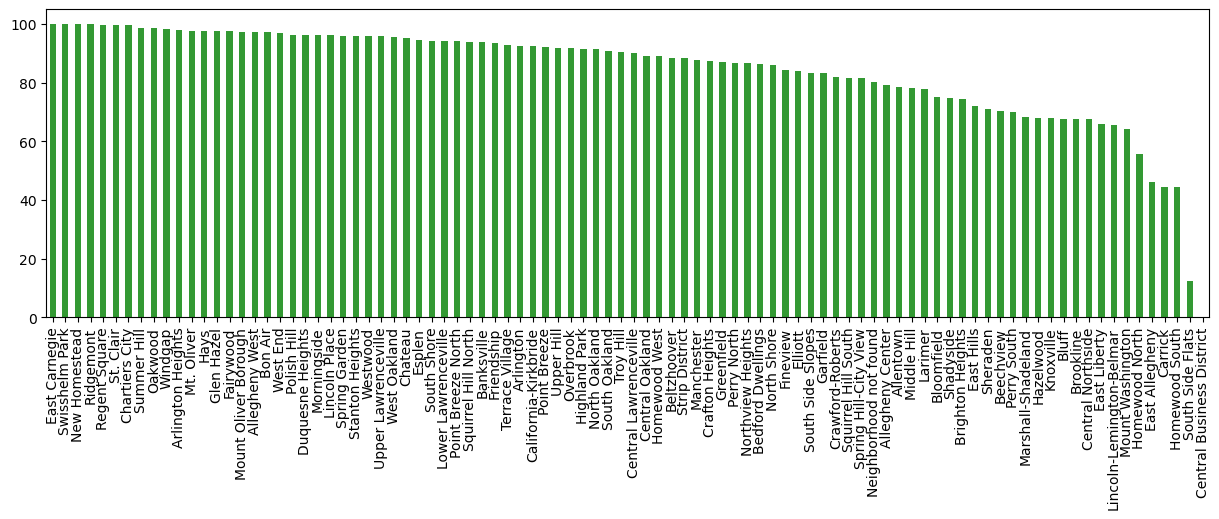

In [5]:
df3=pd.Series(crimeScore, index = Neighborhood2).sort_values( ascending=False).plot.bar(alpha = 0.8, color = 'green', figsize = (15, 4))